# Linear regression with Gradient Descent

* [Cost function and optimization by Gradient Descent](#Cost-function-and-optimization-by-Gradient-Descent)
* [Linear regression with one variable](#Linear-regression-with-one-variable)
* [Linear regression with multiple variables](#Linear-regression-with-multiple-variables)

Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables. The ecuation of the regression line is `y=mx+b` but usually too represented as:

\begin{equation*}
h(x_i) = {θ_0 + θ_1x_i}
\end{equation*}

Where:
* x / x_i    : explanatory variable (data)
* y / h(x_i) : output prediction
* m / θ_1    : slope or steepness of the line (coefficient / parameter 1)
* b / θ_0    : bias (coefficient / parameter 2)

Hence, by tweaking the parameters `m` and `b`, we can create a line that will best describe the relationship between `x` and `y`. Gradient descent will help us with this.

## Complexity: O(n * epoch) = O(n)

Linear regression has to run on all examples of the training set at least once, so the cost is O(n).

## Cost function and optimization by Gradient Descent

The cost function will be the one that measures how well we are doing in our predictions. In Linear Regression we will use the mean squared error, which computes the squared error from our line to the training data, example by example, and then the mean of all those values.

\begin{equation*}
J(m,b) = \frac{1}{N} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
\end{equation*}

Once we know how good is our prediction **in all the training dataset**, thanks to the cost function, we need to find a way to make that cost as low as possible. For this, **we will try to find the parameters that give us that minimum cost**. For this, we need to obtain the **slope or the partial derivative of each of those parameters with respect to the cost function**. Here we see the formula for each of them:

\begin{equation*}
\begin{split}dJ(m,b) =
   \begin{bmatrix}
     \frac{df}{dm}\\
     \frac{df}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{2}{N} \sum_{i=1}^{n} -x_i(y_i - (mx_i + b)) \\
     \frac{2}{N} \sum_{i=1}^{n} -(y_i - (mx_i + b)) \\
    \end{bmatrix}\end{split}
\end{equation*}

The process of finding the optimal values for m and b is to then minimize our derivatives. Training a machine learning algorithm or a neural network really is just the process of minimizing the cost function.

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data

### Linear regression with one variable

In [2]:
iris_x = [i[0] for i in iris_data] # get only one variable from iris data
iris_x[:6]

iris_y = [i[2] for i in iris_data] # get only one variable from iris data
iris_y[:6]

[1.4, 1.4, 1.3, 1.5, 1.4, 1.7]

In [3]:
def linear_regression(X, y, m = 0, b = 0, epochs = 100, learning_rate = 0.001):
    N = float(len(y))
    
    m_epoch = [m]
    b_epoch = [b]
    cost_epoch = []

    for e in range(epochs):
        # we apply the linear regression to all the dataset at once
        y_hat = (m * np.array(X)) + b 
        
        # get the cost for the entire training set
        cost = sum([loss ** 2 for loss in (y-y_hat)]) / N
        
        # compute gradients and apply step
        # dm is the partial derivative of m with respect to the cost
        # db is the partial derivative of b with respect to the cost
        dm = -(2 / N) * sum(X * (y-y_hat))
        db = -(2 / N) * sum(y-y_hat)
        
        m = m - (learning_rate * dm)
        b = b - (learning_rate * db)
        
        # save results
        m_epoch.append(m)
        b_epoch.append(b)
        cost_epoch.append(cost)
        
        if e % 100 == 0:
            print("iter: {} cost: {}".format(e, cost))
            #line = ((m * np.array(X)) + b)
            #plt.plot(X, y, 'o', X, line)
    
    return m, b, cost, m_epoch, b_epoch, cost_epoch

### Results

In [4]:
best_m, best_b, cost, m_array, b_array, cost_array = linear_regression(iris_x, iris_y, epochs = 1000)

iter: 0 cost: 17.220000000000002
iter: 100 cost: 1.7497133159420715
iter: 200 cost: 1.7420717213142218
iter: 300 cost: 1.7344934433397419
iter: 400 cost: 1.7269726099363087
iter: 500 cost: 1.7195087856629159
iter: 600 cost: 1.7121015383811615
iter: 700 cost: 1.7047504392283288
iter: 800 cost: 1.6974550625925422
iter: 900 cost: 1.6902149860881406


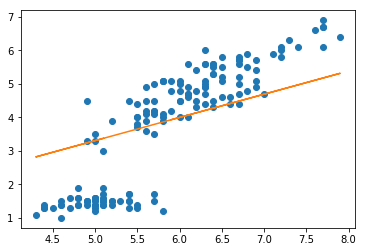

In [5]:
line = ((best_m * np.array(iris_x)) + best_b)
plt.plot(iris_x, iris_y, 'o', iris_x, line)

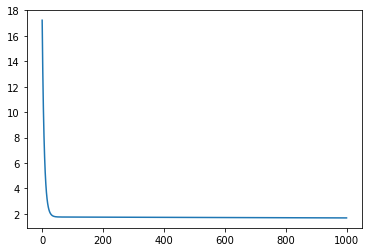

In [6]:
plt.plot(cost_array) # cost per epoch

***

### Linear regression with multiple variables

This is quite similar to the simple linear regression model we have discussed previously, but with multiple independent variables contributing to the dependent variable and hence multiple coefficients to determine and complex computation due to the added variables. Jumping straight into the equation of multivariate linear regression:
\begin{equation*}
Y_i = \alpha + W_{1}x_{i}^{(1)} + W_{2}x_{i}^{(2)}+....+W_{n}x_{i}^{(n)}
\end{equation*}
Where:
* x_i(1) : variable 1 of the example i
* W_1 : weight / coefficient / parameter for the variable 1
* alpha: bias

In [7]:
def multivariate_linear_regression(X, weights):
    return np.dot(X, weights)

### Cost for multiple variables

Now we need a cost function to audit how our model is performing. The math is the same, except we swap the `mx+b` expression for `W1x1+W2x2+W3x3` in case we have three variables. We also divide the expression by 2 to make derivative calculations simpler.
\begin{equation*}
J(W) =  \frac{1}{2N} \sum_{i=1}^{n} (y_i - (W_1 x_1 + W_2 x_2 + W_3 x_3))^2
\end{equation*}

In [8]:
def compute_cost(y, y_hat):
    sq_error = (y_hat - y)**2
    return 1.0/(2*len(y)) * sq_error.sum()

### Gradient descent in multivariate linear regression

Again we need partial derivatives of the cost to obtain our gradients so we can optimize our cost. The formulas we obtained thanks to chain rule are these:

\begin{equation*}
J'(W_1) = -x_1(y - \hat{y}) = -x_1(y - (W_1 x_1 + W_2 x_2 + W_3 x_3)) \\
J'(W_2) = -x_3(y - \hat{y}) = -x_2(y - (W_1 x_1 + W_2 x_2 + W_3 x_3)) \\
J'(W_3) = -x_3(y - \hat{y}) = -x_3(y - (W_1 x_1 + W_2 x_2 + W_3 x_3))
\end{equation*}

We will make use of vectorization and linear algebra again to compute these, but first a non vectorized version to better understand what is going on.

In [9]:
def initialize_weights(n_variables):
    # Initializes an array of weigths to zero
    return np.zeros((n_variables,1))

def get_predictions(X, weights):
    # Predicts results of multivariate regression
    return np.dot(X, weights)

def compute_cost(y, y_hat):
    sq_error = (y_hat - y)**2
    return 1.0/(2*len(y)) * sq_error.sum()

def compute_gradients(X, y, y_hat):
    # With the formula above we know that
    # gradient = -X.T * (y - y_hat) / N
    return np.dot(-X.T, y - y_hat) / len(y) 

def update_parameters(weights, gradients, learning_rate):
    return weights - (learning_rate * gradients)

def lineal_regression_multivariate(X, y, epochs = 100, learning_rate = 0.0001, verbose = False):
    n_variables = X.shape[1]
    weights = initialize_weights(n_variables)
    
    cost_epoch = []
    predictions_epoch = []
    gradients_epoch = []
    weights_epoch = []
    
    for i in range(epochs):
        predictions = get_predictions(X, weights)
        cost = compute_cost(y, predictions)
        gradients = compute_gradients(X, y, predictions)
        weights = update_parameters(weights, gradients, learning_rate)
        
        cost_epoch.append(cost)
        predictions_epoch.append(predictions)
        gradients_epoch.append(gradients)
        weights_epoch.append(weights)
        
        if verbose > 0:
            print("Epoch: {} Cost: {}".format(i, cost))
            if verbose > 1:
                print("- X: {}".format(X[:5]))
                print("- Weights: {}".format(weights))
                print("- Predictions: {}".format(predictions[:5]))
                print("- Gradients: {}".format(gradients[:5]))
    
    return predictions, cost, gradients, weights, cost_epoch, weights_epoch

In [10]:
iris_x = np.array([i[0:] for i in iris_data]) # get only [1, 2, 3] variables from iris data
iris_y = np.array([i[0] for i in iris_data]) # get only [0] variable from iris data

predictions, cost, gradients, weights, cost_epoch, weights_epoch = lineal_regression_multivariate(iris_x, 
                                                                                                  iris_y, 
                                                                                                  epochs = 1000, 
                                                                                                  learning_rate = 0.0001, 
                                                                                                  verbose = 0)
print("Cost: {}".format(cost))

Cost: 74.3631884905815


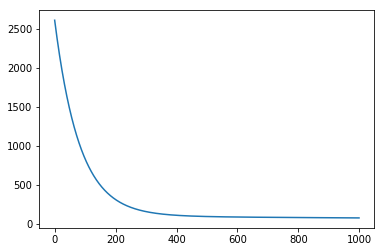

In [11]:
plt.plot(cost_epoch) # cost per epoch

## Notes:

- Realize that the way we evaluate the performance of the predictions (MSE) is not the same as computing the derivatives for the gradients.

## Links:
* None yet